In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

In [102]:
df=pd.read_csv("Social_Network_Ads.csv",usecols=["Age","EstimatedSalary","Purchased"])
df.sample(5)

,Age,EstimatedSalary,Purchased
116,35,75000,0
382,44,139000,1
34,27,90000,0
66,24,19000,0
73,33,113000,0


In [103]:
x=df[["Age","EstimatedSalary"]]
y=df[["Purchased"]]

# Train Test Split

In [104]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

# Training Model on Normal Data

In [107]:
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()

clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_predict1=clf1.predict(X_test)
y_predict2=clf2.predict(X_test)

print("LR (Actual): ",accuracy_score(y_test,y_predict1))
print("DTC (Actual): ",accuracy_score(y_test,y_predict2))

LR (Actual):  0.88
DTC (Actual):  0.85


C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Using Function Transformer

In [113]:
trf=FunctionTransformer(func=lambda x: np.sqrt(x))

X_train_transformed=trf.fit_transform(X_train)
X_test_transformed=trf.transform(X_test)

# Training Data on Transformed Data

In [116]:
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()

clf1.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_predict1=clf1.predict(X_test_transformed)
y_predict2=clf2.predict(X_test_transformed)

print("LR (Transformed): ",accuracy_score(y_test,y_predict1))
print("DTC (Transformed): ",accuracy_score(y_test,y_predict2))

LR (Transformed):  0.86
DTC (Transformed):  0.82


C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Comparison Before vs After

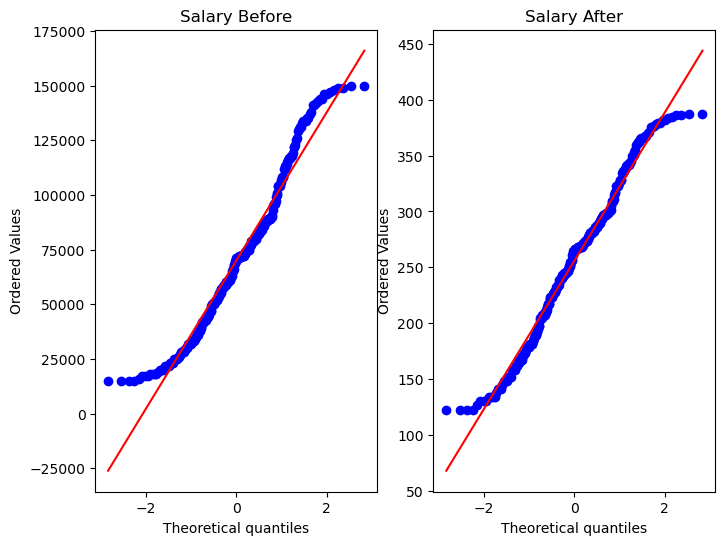

In [119]:
plt.figure(figsize=(8,6))
plt.subplot(121)
stats.probplot(X_train["EstimatedSalary"],dist="norm",plot=plt)
plt.title("Salary Before")

plt.subplot(122)
stats.probplot(X_train_transformed["EstimatedSalary"],dist="norm",plot=plt)
plt.title("Salary After")

plt.show()